In [2]:
!kaggle datasets download -d myrios/cost-of-living-index-by-country-by-number-2024

Dataset URL: https://www.kaggle.com/datasets/myrios/cost-of-living-index-by-country-by-number-2024
License(s): other




  0%|          | 0.00/2.83k [00:00<?, ?B/s]
100%|##########| 2.83k/2.83k [00:00<00:00, 305kB/s]


In [3]:
!kaggle datasets download -d myrios/cost-of-living-index-by-country-by-number-2024

Dataset URL: https://www.kaggle.com/datasets/myrios/cost-of-living-index-by-country-by-number-2024
License(s): other
cost-of-living-index-by-country-by-number-2024.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import pandas as pd

cost = 'cost_living.csv'
df = pd.read_csv(cost)

df

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [6]:
df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Cost of Living Index            121 non-null    float64
 3   Rent Index                      121 non-null    float64
 4   Cost of Living Plus Rent Index  121 non-null    float64
 5   Groceries Index                 121 non-null    float64
 6   Restaurant Price Index          121 non-null    float64
 7   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.7+ KB


In [8]:
df.isna().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.shape

(0, 8)

In [31]:
import geopandas as gpd
import plotly.express as px
import pandas as pd


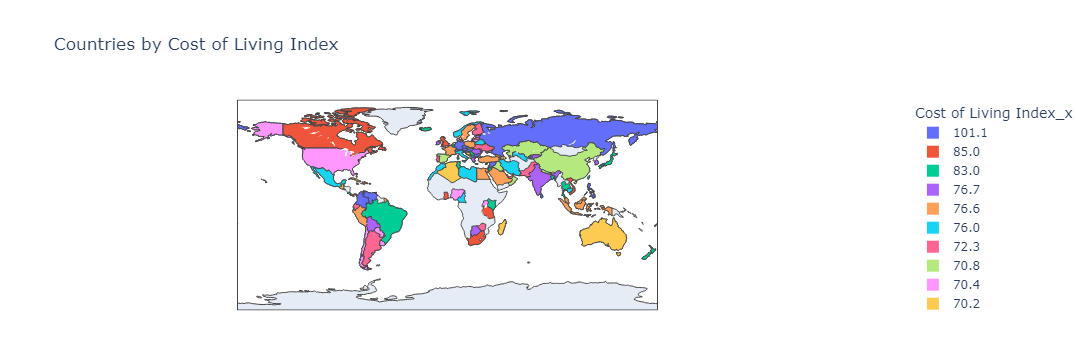

In [38]:
import geopandas as gpd
import plotly.express as px
import pandas as pd

# Membaca file geospatial dan data CSV
world = gpd.read_file('cost_living.csv')  # Pastikan ini adalah file geospatial, bukan CSV biasa
df = pd.read_csv('cost_living.csv')  # Data CSV biasa

# Mengganti nama kolom di world jika perlu
world = world.rename(columns={'name': 'Country'})

# Menggabungkan DataFrame
merged = world.merge(df, on='Country')

fig = px.choropleth(
    merged,
    locations="Country",
    locationmode='country names',
    color="Cost of Living Index_x",  # Gunakan nama kolom yang benar setelah merge
    hover_name="Country",
    hover_data={
        'Cost of Living Index_x': True,
        'Rent Index_x': True,
        'Cost of Living Plus Rent Index_x': True,
        'Groceries Index_x': True,
        'Restaurant Price Index_x': True,
        'Local Purchasing Power Index_x': True
    },
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Countries by Cost of Living Index"
)
fig.update_layout(margin=dict(l=0, r=0, t=100, b=50))

fig.show()


In [61]:
import plotly.express as px
import numpy as np

world = gpd.read_file('cost_living.csv')  # Pastikan ini adalah file geospatial, bukan CSV biasa
df = pd.read_csv('cost_living.csv')  # Data CSV biasa

world = world.rename(columns={'name': 'Country'})

# Menggabungkan DataFrame
merged = world.merge(df, on='Country')

print(df.columns)

df = px.data.gapminder().query("year == 2024")
fig = px.treemap(df, path=[px.Constant("world"), 'contitent', 'Country'], values='Cost of Living Index',
                  color='Cost Of Living Index', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['Cost'])
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Index(['Rank', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')


   Rank      Country  Cost of Living Index  Rent Index  \
0     1  Switzerland                 101.1        46.5   
1     2      Bahamas                  85.0        36.7   
2     3      Iceland                  83.0        39.2   
3     4    Singapore                  76.7        67.2   
4     5     Barbados                  76.6        19.0   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                            74.9            109.1                    97.0   
1                            61.8             81.6                    83.3   
2                            62.0             88.4                    86.8   
3                            72.1             74.6                    50.4   
4                            48.9             80.8                    69.4   

   Local Purchasing Power Index  
0                         158.7  
1                          54.6  
2                         120.3  
3                         111.1  
4           

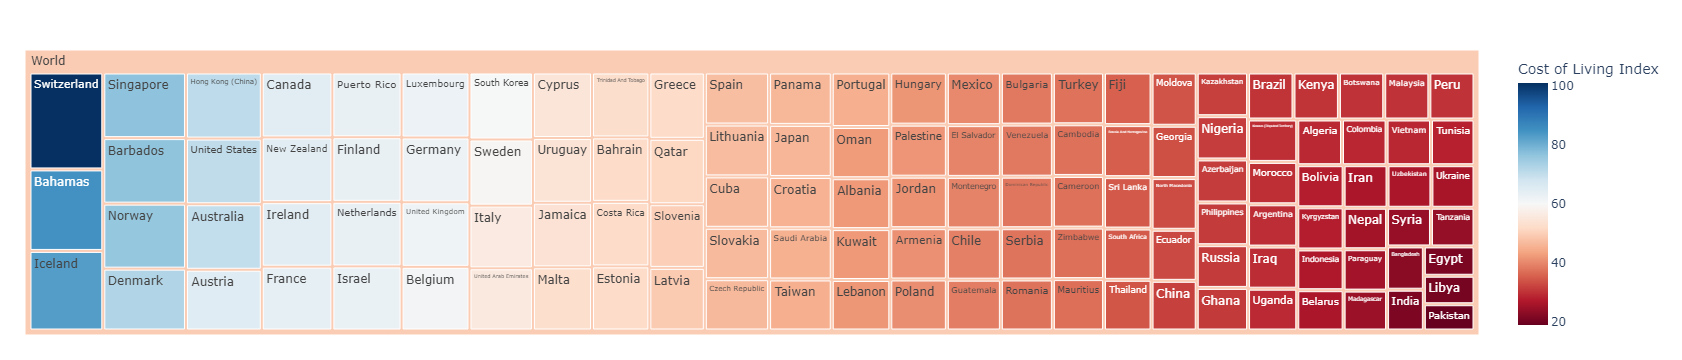

In [72]:
import pandas as pd
import plotly.express as px

# Step 1: Load the data
df = pd.read_csv('cost_living.csv')

# Display the first few rows to ensure it's loaded correctly
print(df.head())

# Step 2: Create the treemap
fig = px.treemap(df, 
                 path=[px.Constant("World"), 'Country'], 
                 values='Cost of Living Index',
                 color='Cost of Living Index',
                 hover_data={
                     'Rent Index': True, 
                     'Cost of Living Plus Rent Index': True, 
                     'Groceries Index': True, 
                     'Restaurant Price Index': True, 
                     'Local Purchasing Power Index': True
                 },
                 color_continuous_scale='RdBu')

# Update layout
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Show plot
fig.show()


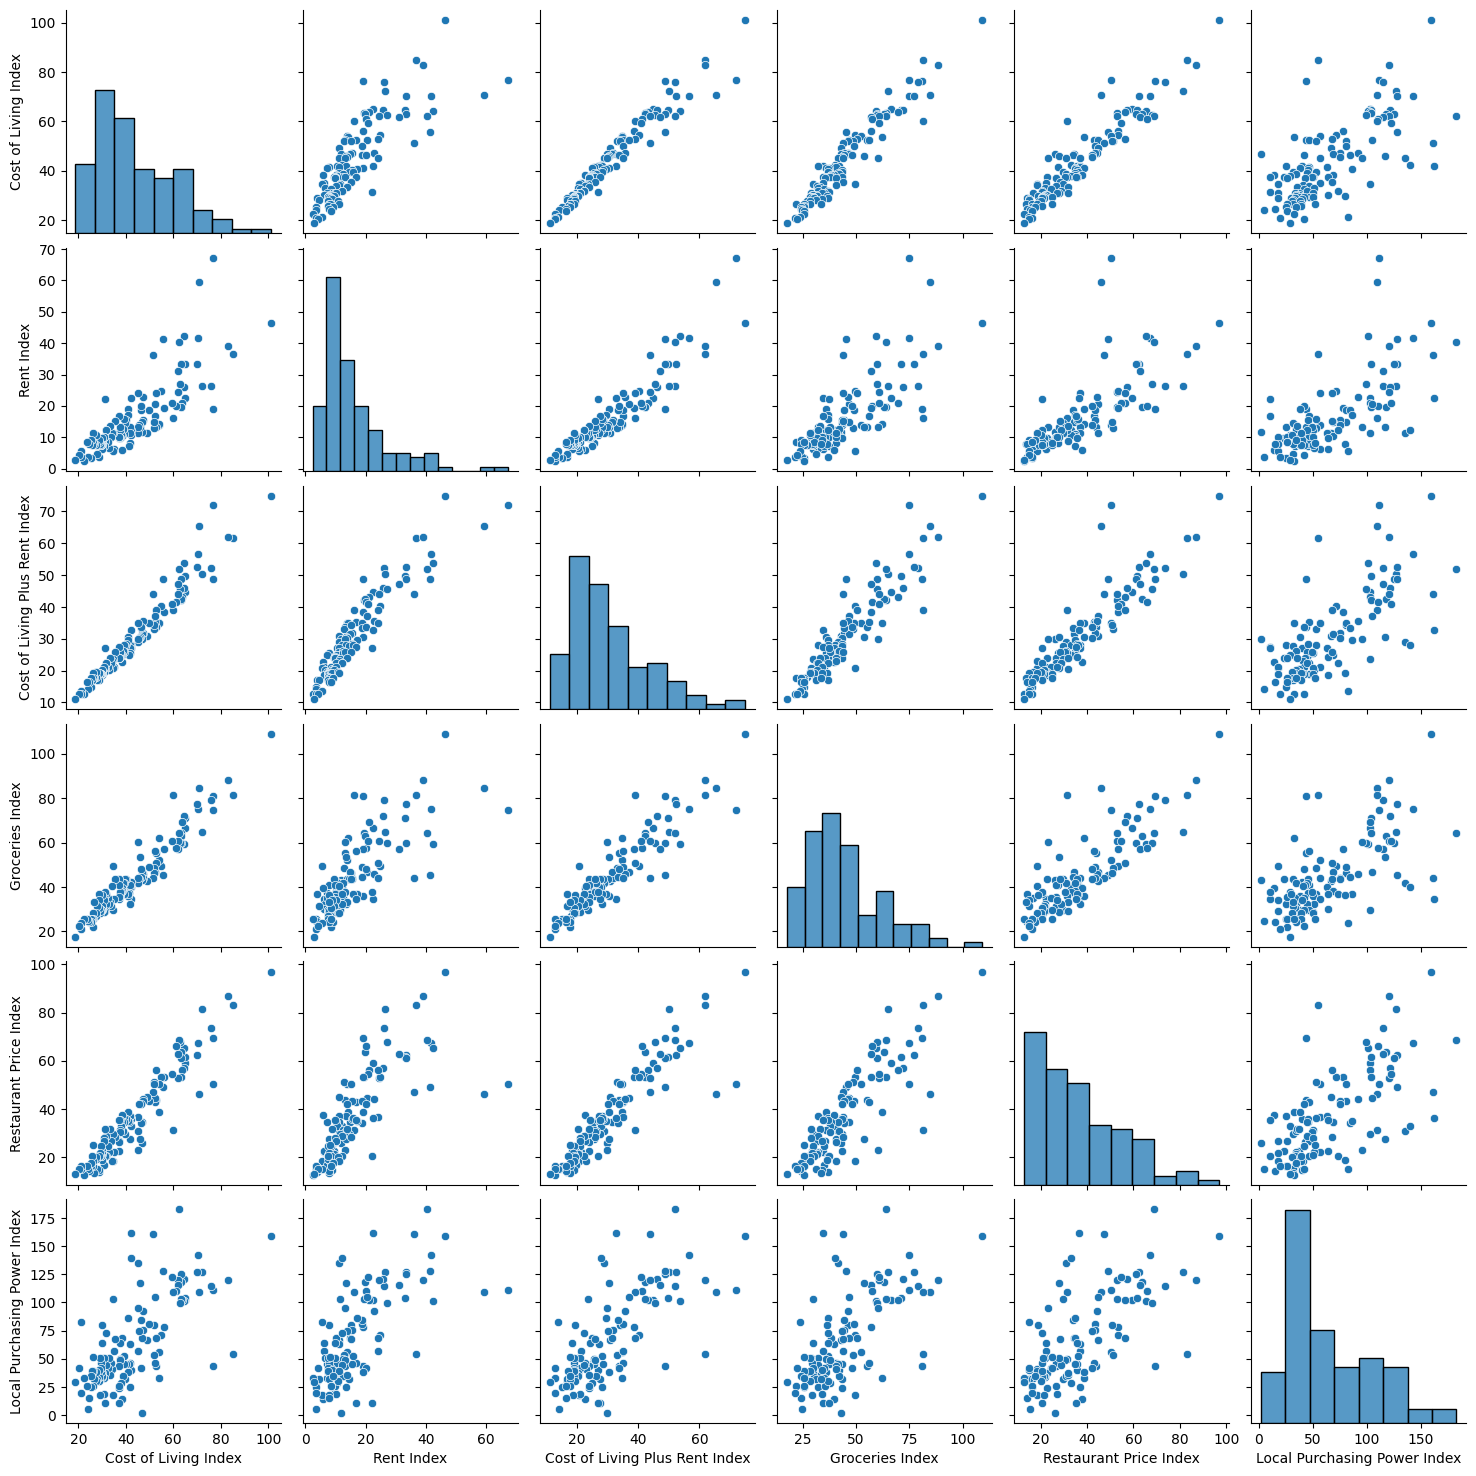

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars=df.columns[2:])
plt.show()

   Rank      Country  Cost of Living Index  Rent Index  \
0     1  Switzerland                 101.1        46.5   
1     2      Bahamas                  85.0        36.7   
2     3      Iceland                  83.0        39.2   
3     4    Singapore                  76.7        67.2   
4     5     Barbados                  76.6        19.0   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                            74.9            109.1                    97.0   
1                            61.8             81.6                    83.3   
2                            62.0             88.4                    86.8   
3                            72.1             74.6                    50.4   
4                            48.9             80.8                    69.4   

   Local Purchasing Power Index  
0                         158.7  
1                          54.6  
2                         120.3  
3                         111.1  
4           

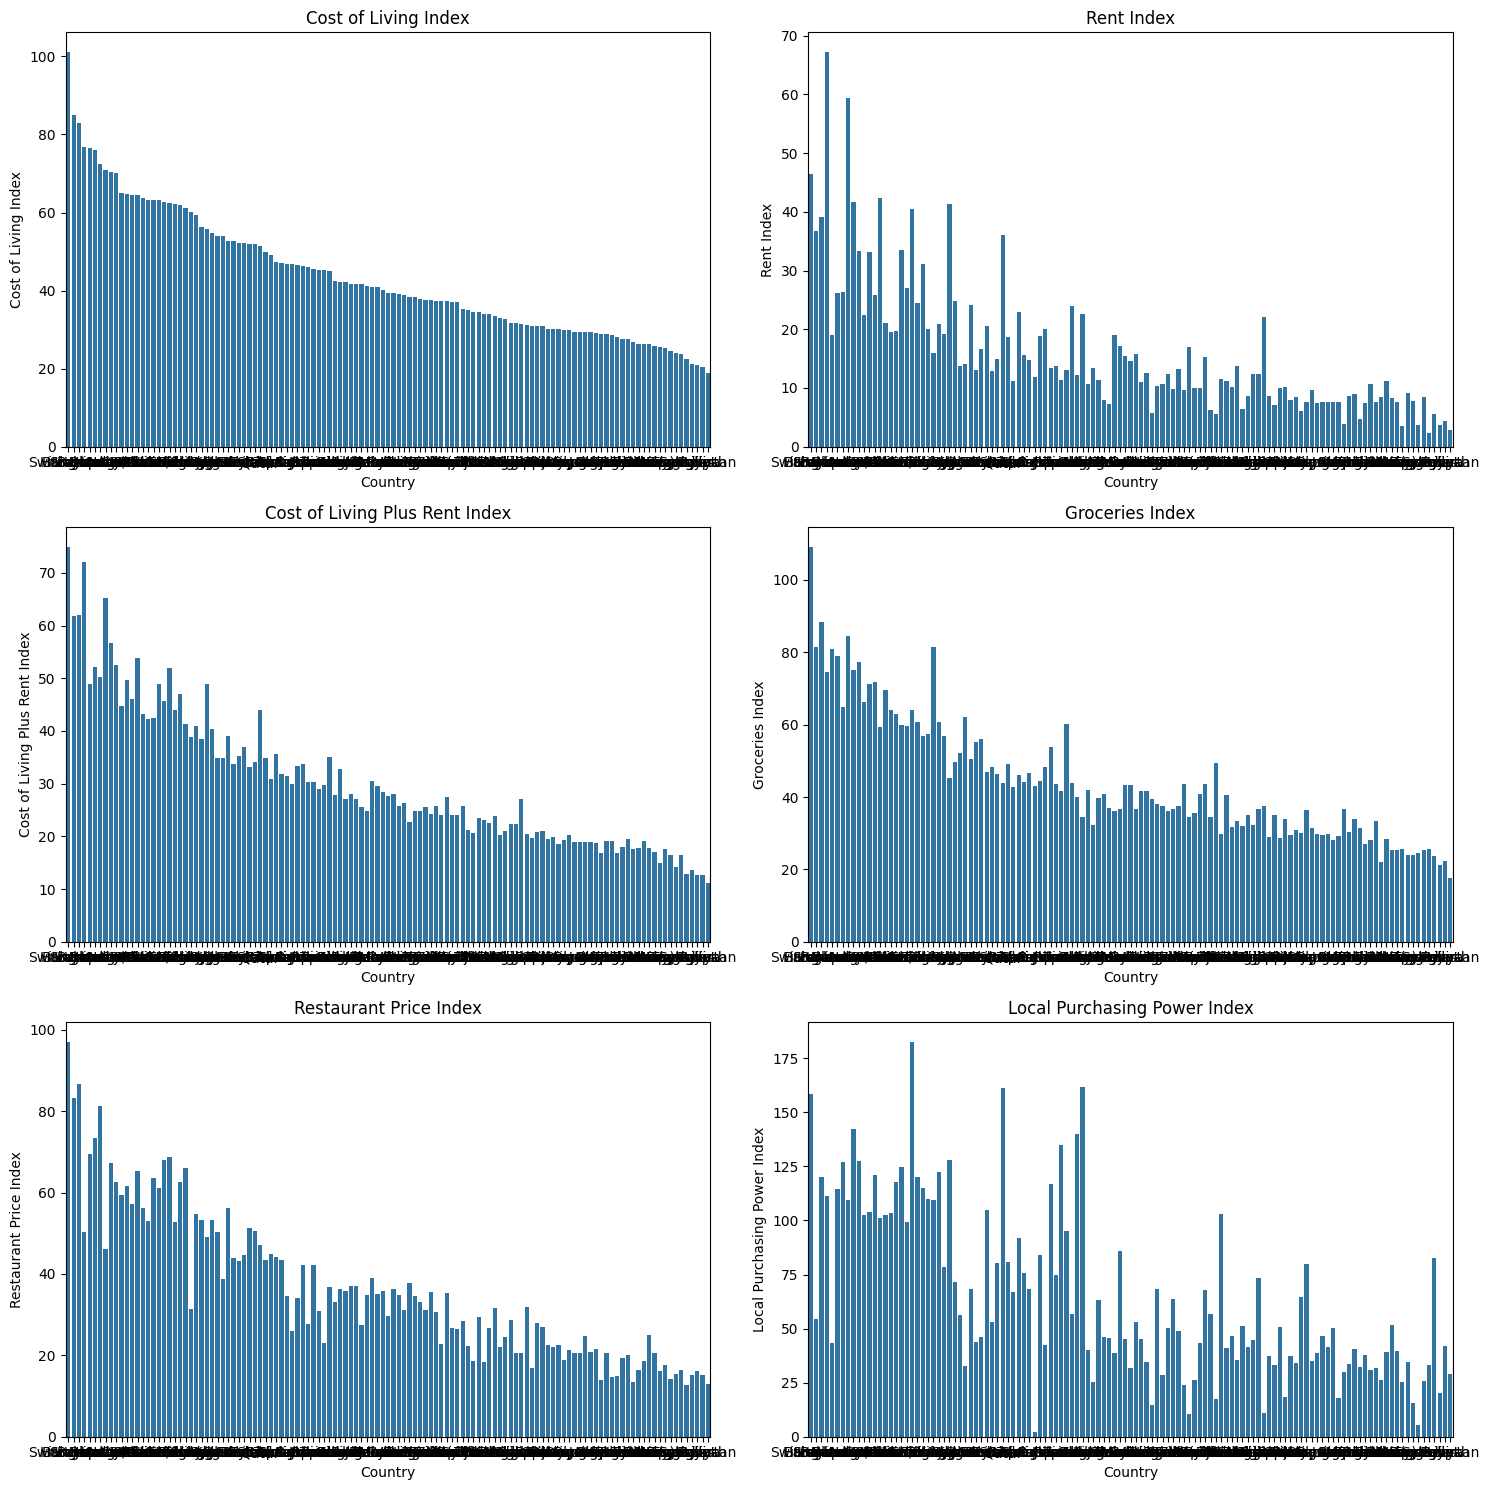

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
df = pd.read_csv('cost_living.csv')

# Display the first few rows to ensure it's loaded correctly
print(df.head())

# Step 2: Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Flatten axes array for easy iteration
axes = axes.flatten()

# List of columns to plot
columns = [
    'Cost of Living Index', 
    'Rent Index', 
    'Cost of Living Plus Rent Index', 
    'Groceries Index', 
    'Restaurant Price Index', 
    'Local Purchasing Power Index'
]

# Step 3: Plot each column
for i, col in enumerate(columns):
    sns.barplot(x='Country', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel(col)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [80]:
 Grab neccessary data
df_country = df.groupby(["Country"])

df_costLiving = df_country[["Cost of Living Index"]].mean()
df_purchasePower = df_country[["Local Purchasing Power Index"]].mean()

# Reset Country field to be in the same level
df_costLiving.reset_index(level=0, inplace=True)
df_purchasePower.reset_index(level=0, inplace=True)

# Prepare data for plotting 
df_sortCostOfLiving = df_costLiving.sort_values("Cost of Living Index", ascending = False)
df_sortPurchasePower = df_purchasePower.sort_values("Local Purchasing Power Index", ascending = False)

SyntaxError: invalid syntax (3018153435.py, line 1)

NameError: name 'df_sortrentindex' is not defined

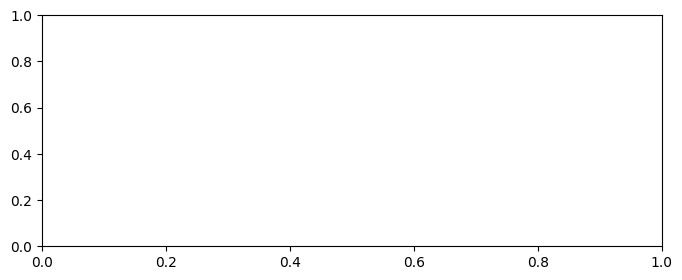

In [79]:
fig, ax = plt.subplots(figsize=(8, 3)) # set graph size
sns.barplot(data=df_sortrentindex[:20], y = "Country", x = "Local Purchasing Power Index")
plt.title("Top Countries by Local Purchasing Power", fontsize = 16)
plt.yticks(rotation=0, fontsize = 8)
plt.grid()
plt.show()